In [1]:
import numpy as np

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload

%autoreload 2

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

# Plot Colormaps

In [5]:
eminus_data = np.load('/data/jet-images/eminus_Ele-Eta0-PhiPiOver2-Energy50.npy')

In [6]:
eminus_data.shape

(20890, 28, 28)

In [7]:
eminus_mean_signal = np.mean(eminus_data, axis=0)

In [8]:
eminus_mean_signal.shape

(28, 28)

In [9]:
from lib.histograms import plot_hist

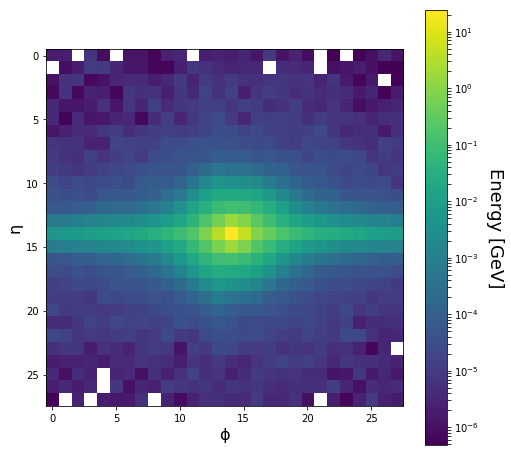

In [10]:
plot_hist(eminus_mean_signal)


In [11]:
eminus_data_sum = np.sum(eminus_data, axis=0)

In [12]:
eminus_data_sum.shape

(28, 28)

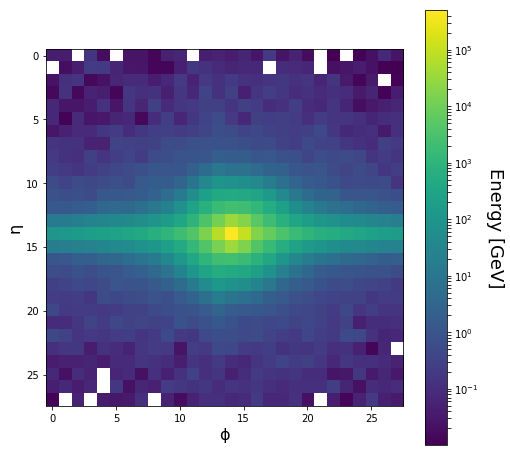

In [13]:
plot_hist(eminus_data_sum)

In [14]:
piminus_data = np.load('/data/jet-images/piminus_Pion-Eta0-PhiPiOver2-Energy50.npy')

In [15]:
piminus_mean_signal = np.mean(piminus_data, axis=0)

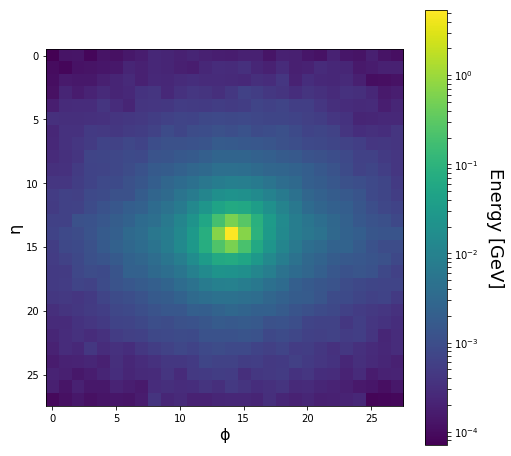

In [16]:
plot_hist(piminus_mean_signal)

In [17]:
piminus_integrated_signal = np.sum(piminus_data, axis=0)

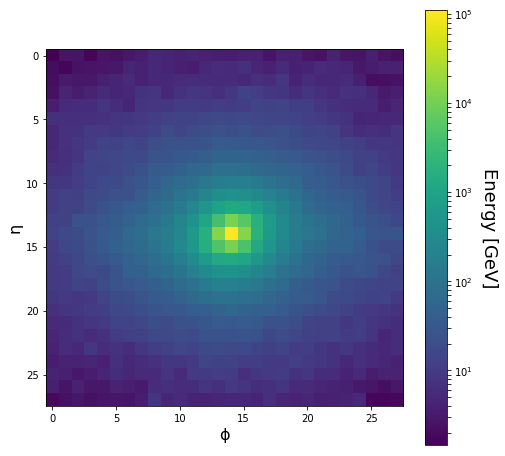

In [18]:
plot_hist(piminus_integrated_signal)

# Plot $\eta$ and $\phi$ components

In [19]:
from lib.histograms import plot_cumulative

In [20]:
from lib.util import mean_eta, mean_phi

In [21]:
eminus_eta_mean = mean_eta(eminus_data)

In [22]:
eminus_eta_mean.shape

(28,)

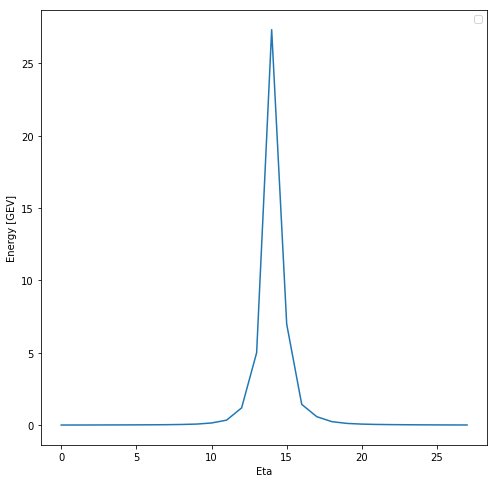

In [23]:
plot_cumulative(data=eminus_eta_mean, ylabel="Energy [GEV]", xlabel="Eta")

In [24]:
eminus_phi_mean = mean_phi(eminus_data)

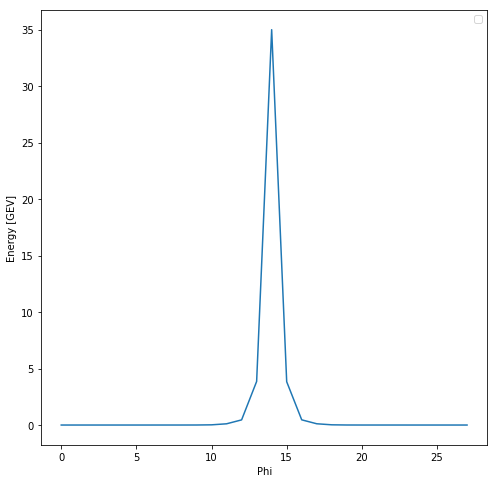

In [25]:
plot_cumulative(data=eminus_phi_mean, ylabel="Energy [GEV]", xlabel="Phi")

In [26]:
piminus_eta_mean = mean_eta(piminus_data)

In [27]:
piminus_phi_mean = mean_phi(piminus_data)

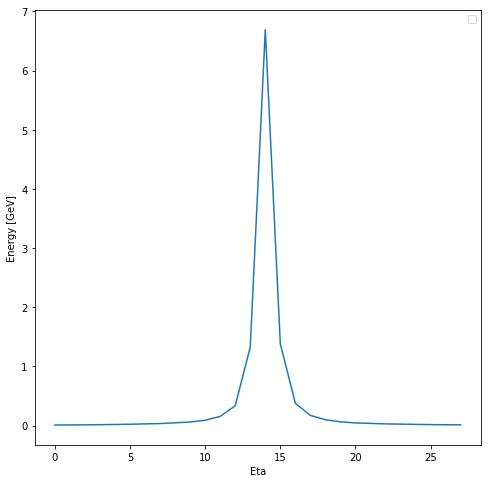

In [28]:
plot_cumulative(piminus_eta_mean, ylabel="Energy [GeV]", xlabel="Eta")

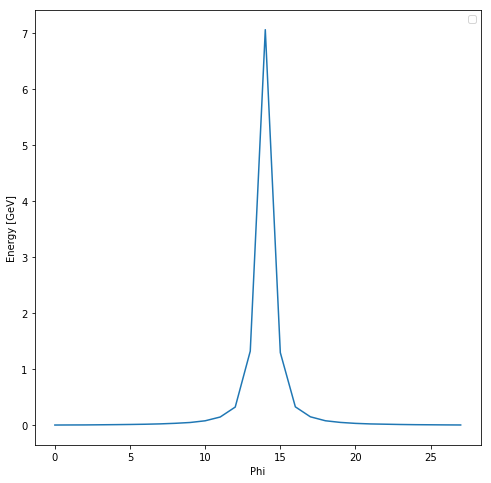

In [29]:
plot_cumulative(piminus_phi_mean, ylabel="Energy [GeV]", xlabel="Phi")

# Plotting comparative charts

In [30]:
photon_data = np.load('/data/jet-images/gamma-Photon-Eta0-PhiPiOver2-Energy50.npy')

In [31]:
photon_eta_mean = mean_eta(photon_data)
photon_phi_mean = mean_phi(photon_data)

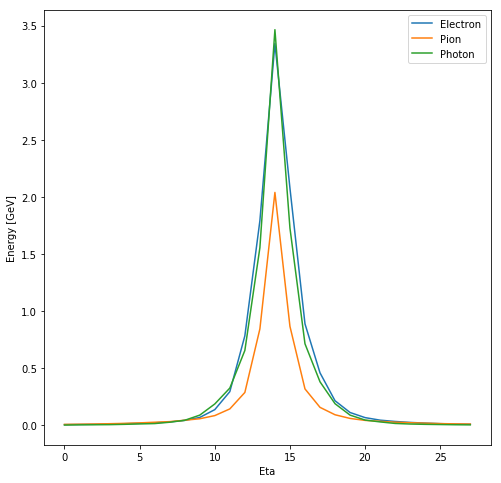

In [32]:
plot_cumulative(data=(np.log1p(eminus_eta_mean), 
                      np.log1p(piminus_eta_mean), 
                      np.log1p(photon_eta_mean)), 
                ylabel="Energy [GeV]", xlabel="Eta",
                legend=("Electron","Pion", "Photon"))

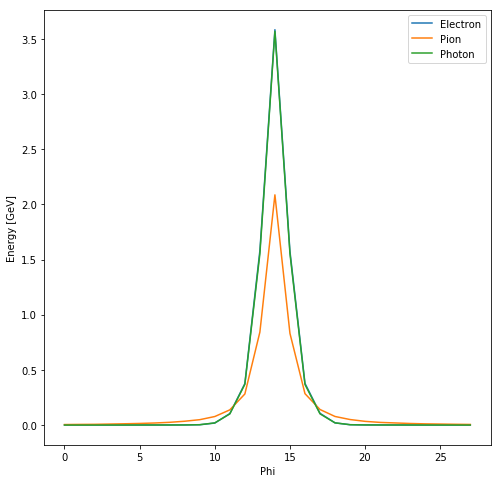

In [33]:
plot_cumulative(data=(np.log1p(eminus_phi_mean), 
                      np.log1p(piminus_phi_mean), 
                      np.log1p(photon_phi_mean)), 
                ylabel="Energy [GeV]", xlabel="Phi",
                legend=("Electron","Pion", "Photon"))

# Energy Distribution

In [34]:
from lib.util import sum_energy

In [35]:
eminus_energy_sum = sum_energy(eminus_data)
piminus_energy_sum = sum_energy(piminus_data)
photon_energy_sum = sum_energy(photon_data)

In [36]:
eminus_energy_sum[0]

47.798706

In [37]:
sum_energy(eminus_data[0])

47.798706

In [38]:
from lib.histograms import plot_energy_hist

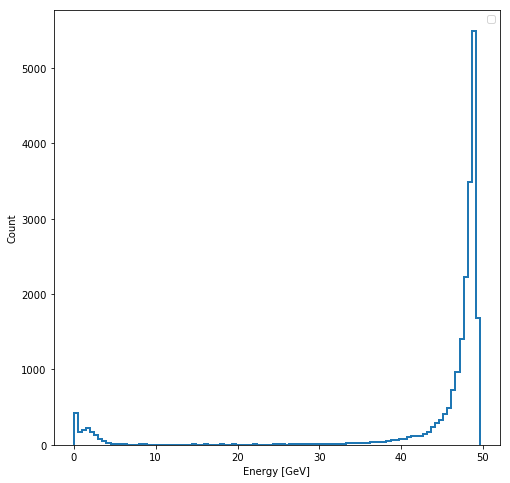

In [39]:
plot_energy_hist(data=eminus_energy_sum, xlabel="Energy [GeV]", ylabel="Count", bins=100)

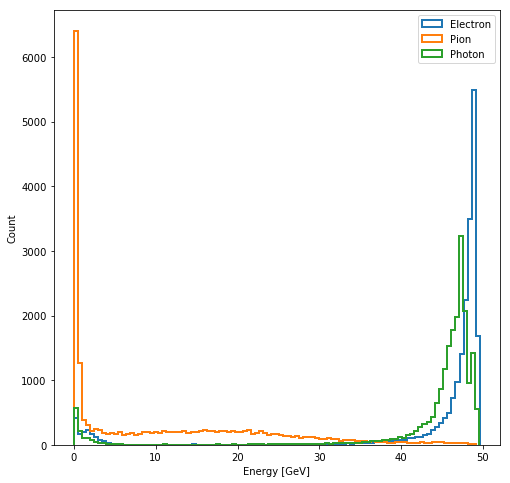

In [40]:
plot_energy_hist(data=(eminus_energy_sum, piminus_energy_sum, photon_energy_sum),
                 xlabel="Energy [GeV]", ylabel="Count", 
                 legend=("Electron", "Pion", "Photon"), bins=100)